In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [4]:
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
import seaborn as sns

We can use seaborn pairplot to identify any attributes that look correlated

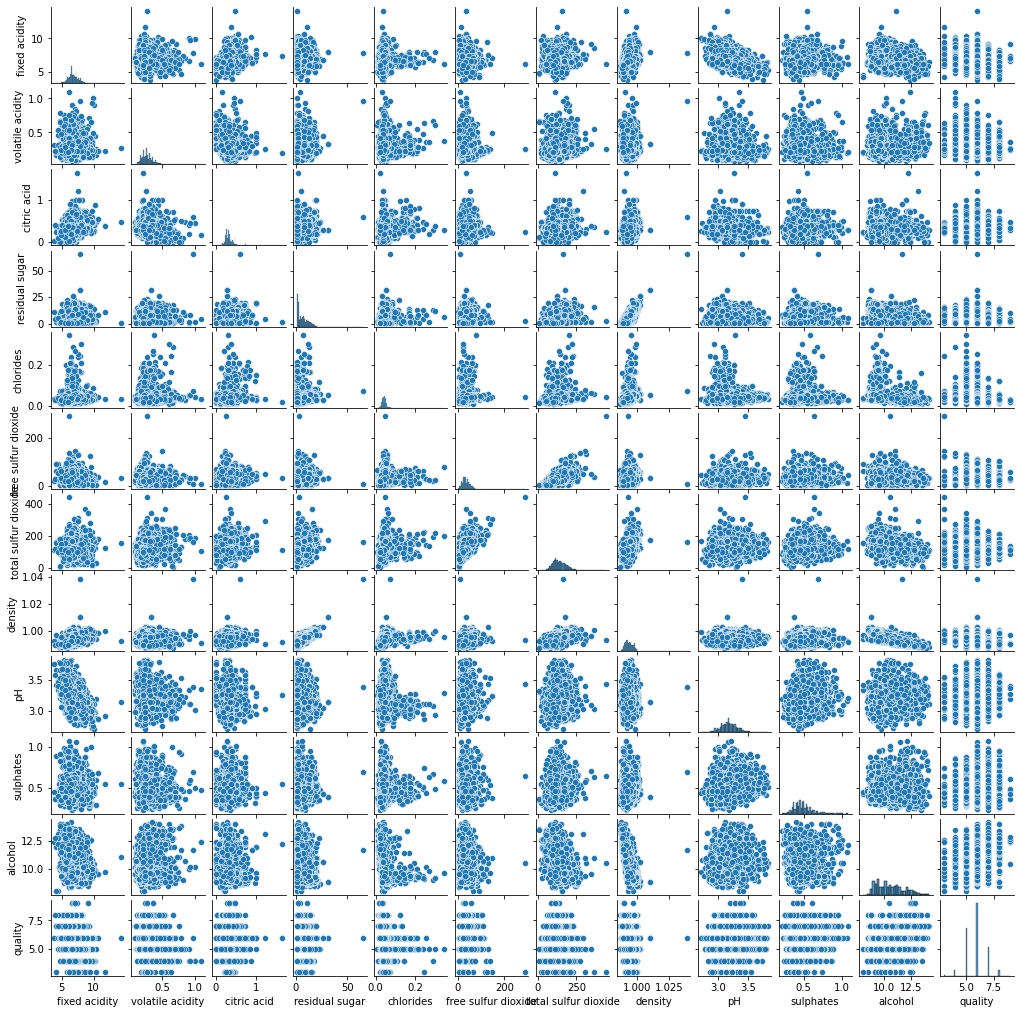

In [10]:
g=sns.pairplot(white_wine)
g.fig.set_size_inches(14,14)

## Regression Model

From the graph above it looks like Density and Alcohol are closely related. 

Let's take a closer look at thise 2 attributes.

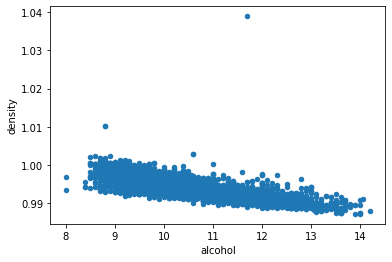

In [74]:
white_wine.plot.scatter('alcohol','density')

We extract those attributes below. Density will be our Y variable and Alcohol will be our X variable.

We need to split the data so that we can evaluate the model later on.

In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(white_wine, test_size = 0.2, random_state = 42)

density_train = train['density']
density_test = test['density']

alcohol_train = train['alcohol']
alcohol_test = test['alcohol']

We need to reshape the data so that it can fit into the Linear Regressor

In [76]:
Y_train = density_train.values.reshape(-1, 1) 
X_train = alcohol_train.values.reshape(-1, 1)

Y_test = density_test.values.reshape(-1, 1) 
X_test = alcohol_test.values.reshape(-1, 1)

We can use a linear regressor from Sci-Kit Learn to draw the regression line

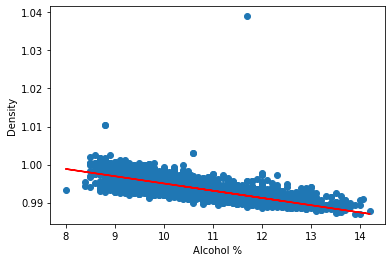

In [77]:
from sklearn.linear_model import LinearRegression

#Create Linear regression object
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

#Predict the values
Y_pred = linear_regressor.predict(X_train)

#Scatter plot the original values
plt.scatter(X_train, Y_train)

#Line plot on the predicted values
plt.plot(X_train, Y_pred, color='red')

plt.xlabel('Alcohol %')
plt.ylabel('Density')
plt.show()

Print out the y intercept and the slope

In [78]:
y_int = linear_regressor.intercept_[0]
print(f'The Y intercept for this Linear Regression is: {y_int:.6}')

slope = linear_regressor.coef_[0][0]
print(f'The Slope for this Linear Regression is: {slope:.6}')

The Y intercept for this Linear Regression is: 1.0141
The Slope for this Linear Regression is: -0.00190612


## Evaluation of Model

Get predictions for the evaluation

In [79]:
Y_pred_test = linear_regressor.predict(X_test)

### Mean Square Error

In [80]:
from sklearn.metrics import mean_squared_error
print('mse:', "{:.3e}".format(mean_squared_error(Y_test,Y_pred_test)))

mse: 2.902e-06


### Mean Absolute Error

In [81]:
from sklearn.metrics import mean_absolute_error
print('mae:', "{:.3e}".format(mean_absolute_error(Y_test,Y_pred_test)))

mae: 1.370e-03


### Root Mean Square Error

In [82]:
from sklearn.metrics import mean_squared_error
print('rmse:', "{:.3e}".format(mean_squared_error(Y_test,Y_pred_test, squared=False)))

rmse: 1.703e-03


### R2 Score

In [83]:
from sklearn.metrics import r2_score
print('r2:', "{:.3}".format(r2_score(Y_test,Y_pred_test)))

r2: 0.645
